Summary Statistics for Training Data:
           date_id item_dept       item_qty      net_sales   store  \
count       612332    612332  612332.000000  612332.000000  612332   
unique          92         3            NaN            NaN       2   
top     2021-12-31   Grocery            NaN            NaN     XYZ   
freq         10738    337195            NaN            NaN  339903   
mean           NaN       NaN       1.534273     335.155858     NaN   
std            NaN       NaN       3.061869     825.643851     NaN   
min            NaN       NaN     -59.000000  -15250.000000     NaN   
25%            NaN       NaN       1.000000     125.000000     NaN   
50%            NaN       NaN       1.000000     215.000000     NaN   
75%            NaN       NaN       1.698000     371.000000     NaN   
max            NaN       NaN     880.000000  316880.280000     NaN   

                 item   invoice_num  
count   612332.000000  5.909050e+05  
unique            NaN           NaN  
top    

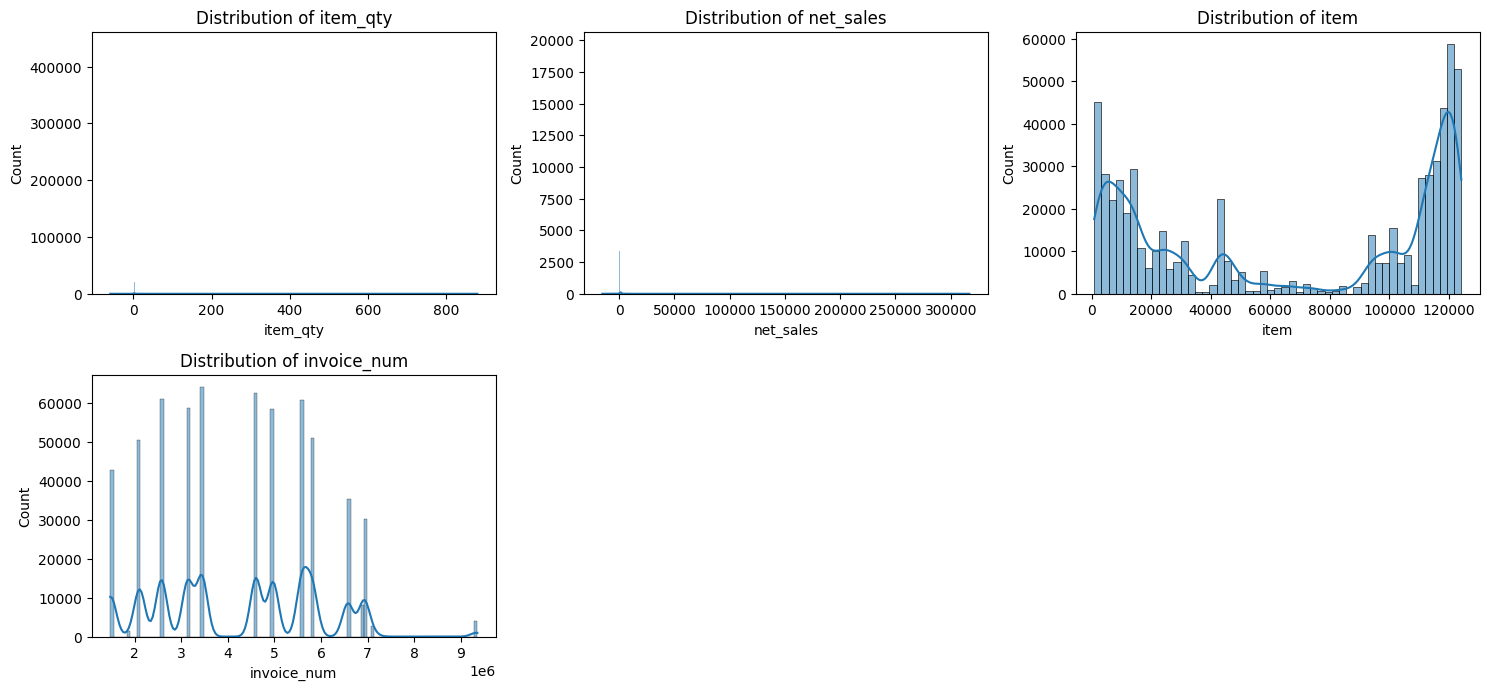

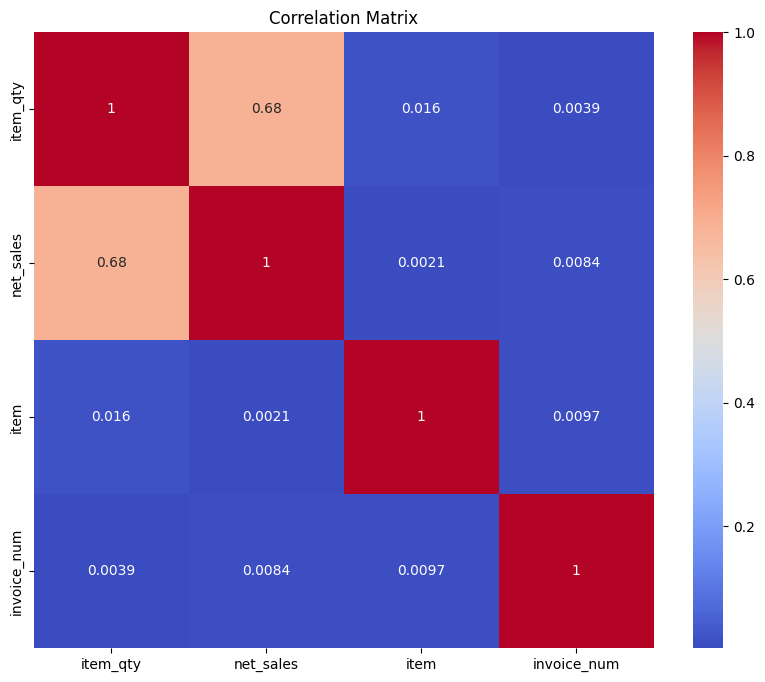

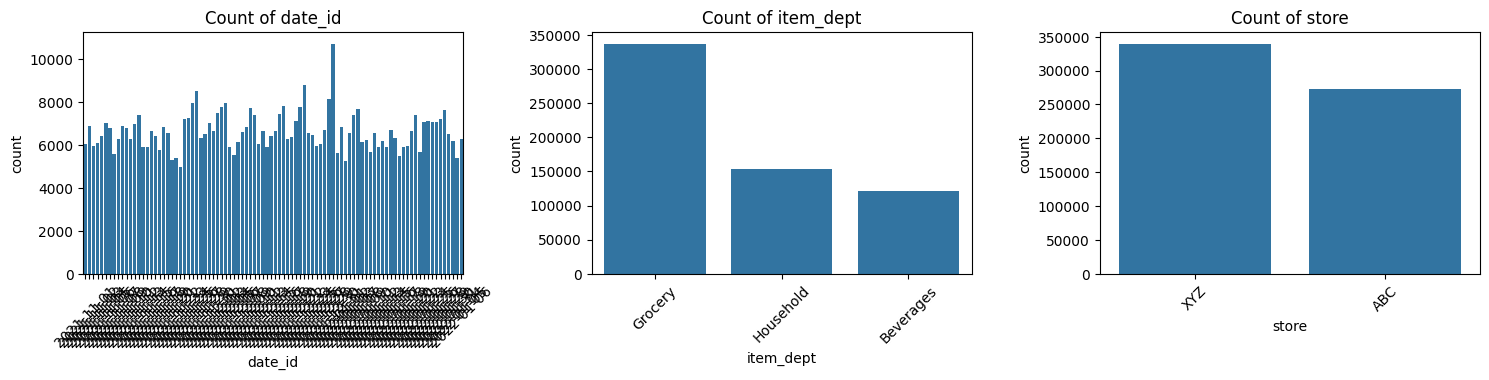

Chi-Square Test between date_id and item_dept: p-value = 0.0
T-test between stores on 'item_qty': t-stat = -15.193135992837576, p-value = 4.0138453063125956e-52


<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_ind, f_oneway

# Load datasets (assuming the datasets are already loaded from your previous steps)
training_data = pd.read_csv('/mnt/data/cleaned_training_data.csv')
test_data = pd.read_csv('/mnt/data/cleaned_test_data.csv')

# 1. Summary Statistics
print("Summary Statistics for Training Data:")
print(training_data.describe(include='all'))

print("\nSummary Statistics for Test Data:")
print(test_data.describe(include='all'))

# 2. Data Distribution - Histograms
numeric_columns = training_data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(training_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 3. Correlation Analysis
correlation_matrix = training_data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Categorical Variable Analysis - Bar Plots
categorical_columns = training_data.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=training_data, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Cross-tabulation and Chi-Square Test
if len(categorical_columns) >= 2:
    crosstab = pd.crosstab(training_data[categorical_columns[0]], training_data[categorical_columns[1]])
    chi2, p, dof, ex = chi2_contingency(crosstab)
    print(f"Chi-Square Test between {categorical_columns[0]} and {categorical_columns[1]}: p-value = {p}")

# 6. Hypothesis Testing - Example (T-test for numerical variables between two groups)
if 'item_qty' in training_data.columns and 'store' in training_data.columns:
    stores = training_data['store'].unique()
    if len(stores) == 2:
        group1 = training_data[training_data['store'] == stores[0]]['item_qty']
        group2 = training_data[training_data['store'] == stores[1]]['item_qty']
        t_stat, p_val = ttest_ind(group1, group2)
        print(f"T-test between stores on 'item_qty': t-stat = {t_stat}, p-value = {p_val}")

# Additional Hypothesis Testing and Visualizations can be added based on the data and hypotheses

# Save plots or data summaries if needed
plt.savefig('/mnt/data/distribution_plots.png')
plt.savefig('/mnt/data/correlation_heatmap.png')
